# EDA on training and test data (JW)
## Table of contents
1. EDA and description of test and training data
2. Data exploration by category
3. Feature engineering and analysis of engineered features
4. Some modeling (SVM and Neural Networks -- neither outperform logistic regression)
5. Preparation for import-and-clean.py
6. Appendix

## 1. EDA and description of test and training data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.gcf().clear()
plt.style.use('seaborn-muted')

train_df = pd.read_csv('assets/input/train.csv')
test_df = pd.read_csv('assets/input/test.csv')

print("Training data shape:",train_df.shape)
print("Test data shape:",test_df.shape) 
# The test set is an order of magnitude greater because there are,
# presumably, entries for every trap, species, and day.

# Dropping duplicates shows the number of unique rows. It turns out these duplicates in train are when 
# the maximum number of mosquitos is reached (50).
print("")
print("Unique rows in test.csv:",test_df.drop_duplicates().shape[0])
print("Unique rows in train.csv:",train_df.drop_duplicates().shape[0])
print("")
print("The test data contains eight rows for every date and every trap (one for each species category of mosquito)")
print("")
print(test_df[['Date', 'Trap','Species']].head(8))
print("")
print("Columns in training data:")
print(list(train_df.columns))
print("")
print("Unique days in training: ", len(train_df.Date.unique()))
print("Unique traps in training: ", len(train_df.Trap.unique()))
print("Unique species in training: ", len(train_df.Species.unique()))
print("These unique combinations account for {} rows of the dataset.".format(len(train_df.Date.unique()) * len(train_df.Trap.unique())* len(train_df.Species.unique())))
print("")
print("Unique days in test: ", len(test_df.Date.unique()))
print("Unique traps in test: ", len(test_df.Trap.unique()))
print("Unique species in test: ", len(test_df.Species.unique()))
print("These unique combinations account for {} rows of the dataset.".format(len(test_df.Date.unique()) * len(test_df.Trap.unique())* len(test_df.Species.unique())))
print("")
print("Unique species in test: ",test_df.Species.unique())
print("Unique species in train: ",train_df.Species.unique())
print("")
print("Counts for each species in train:")
print(train_df['Species'].value_counts())
print("")
print("In the TRAINING data:\n----------")
for bug in train_df['Species'].unique():
    print("There are {} cases with the mosquito {}".format(train_df['WnvPresent'][train_df['Species']==bug].sum(), bug))
print("----------")
print("THERE ARE {} TOTAL CASES IN THE TRAINING YEARS.".format(train_df['WnvPresent'].sum()))
print("----------")
print("There are {} nulls in the training set and {} in the test set.".format(train_df.isna().sum().sum(), test_df.isna().sum().sum()))

Training data shape: (10506, 12)
Test data shape: (116293, 11)

Unique rows in test.csv: 116293
Unique rows in train.csv: 9693

The test data contains eight rows for every date and every trap (one for each species category of mosquito)

         Date  Trap                 Species
0  2008-06-11  T002  CULEX PIPIENS/RESTUANS
1  2008-06-11  T002          CULEX RESTUANS
2  2008-06-11  T002           CULEX PIPIENS
3  2008-06-11  T002        CULEX SALINARIUS
4  2008-06-11  T002         CULEX TERRITANS
5  2008-06-11  T002          CULEX TARSALIS
6  2008-06-11  T002       UNSPECIFIED CULEX
7  2008-06-11  T002         CULEX ERRATICUS

Columns in training data:
['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']

Unique days in training:  95
Unique traps in training:  136
Unique species in training:  7
These unique combinations account for 90440 rows of the dataset.

Unique days in test:  95

## 2. Exploring the data by category:

Some species of mosquitos are responsible for the disease and others are not. While all mosquitos are  most common in August, some that cause the disease are more common in some months than other species. There is significant variability between years.  

In [2]:
dfa = train_df
dfa = pd.DataFrame(dfa.groupby(by = 'Species').sum().reset_index()[['Species','NumMosquitos','WnvPresent']])
dfa

,Species,NumMosquitos,WnvPresent
0,CULEX ERRATICUS,7,0
1,CULEX PIPIENS,44671,240
2,CULEX PIPIENS/RESTUANS,66268,262
3,CULEX RESTUANS,23431,49
4,CULEX SALINARIUS,145,0
5,CULEX TARSALIS,7,0
6,CULEX TERRITANS,510,0


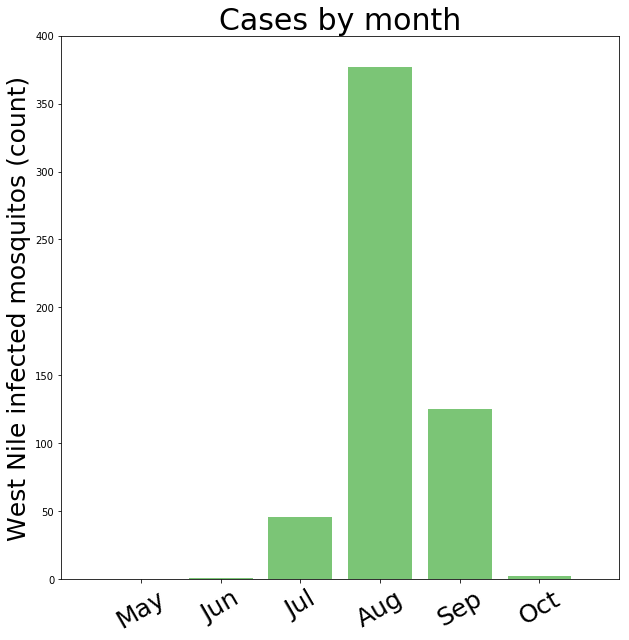

In [3]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.month
dfa = pd.DataFrame(dfa.groupby(by = 'Month').sum().reset_index()[['Month','NumMosquitos','WnvPresent']])
### I couldn't order the columns, so it's not worth it to transform them here; best to do it in the plotting
# dfa['Month'] = dfa['Month'].map({5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October'})

plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Month'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('Cases by month',fontsize = 30)
plt.ylim((0,400))
plt.xlim((4,11))
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbymonth.png")

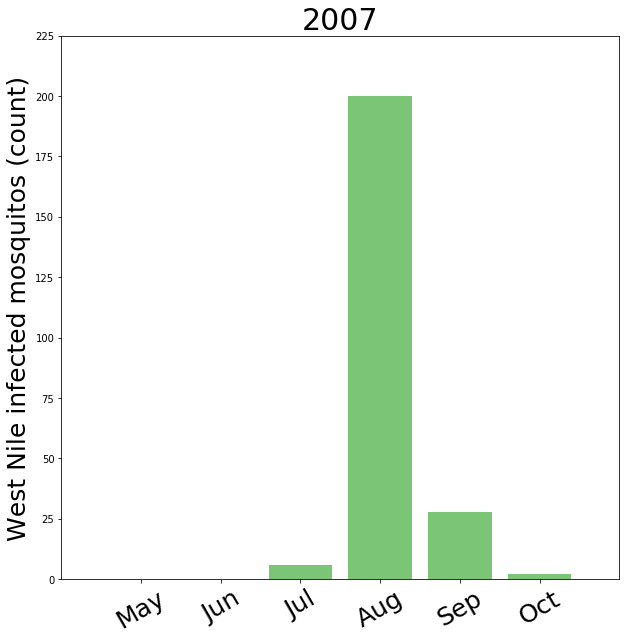

In [4]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = dfa[dfa['Year'] == 2007]
dfa = pd.DataFrame(dfa.groupby(by = 'Month').sum().reset_index()[['Month','NumMosquitos','WnvPresent']])

plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Month'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('2007', fontsize = 30)
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)
plt.ylim((0,225))
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbymonth2007.png")

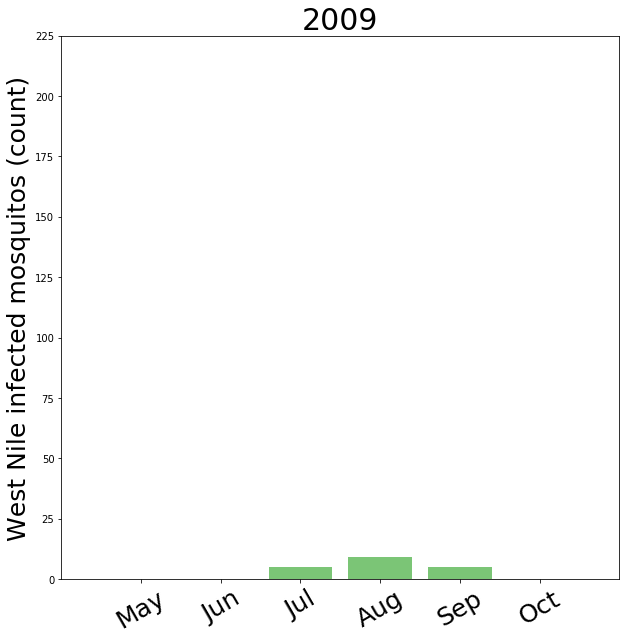

In [5]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = dfa[dfa['Year'] == 2009]
dfa = pd.DataFrame(dfa.groupby(by = 'Month').sum().reset_index()[['Month','NumMosquitos','WnvPresent']])

plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Month'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('2009', fontsize = 30)
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)
plt.ylim((0,225))
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbymonth2009.png")

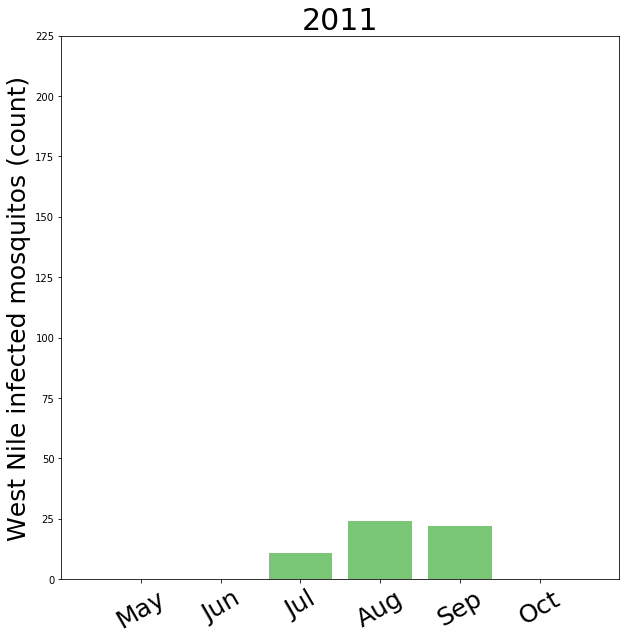

In [6]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = dfa[dfa['Year'] == 2011]
dfa = pd.DataFrame(dfa.groupby(by = 'Month').sum().reset_index()[['Month','NumMosquitos','WnvPresent']])

plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Month'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('2011', fontsize = 30)
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)
plt.ylim((0,225))
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbymonth2011.png")

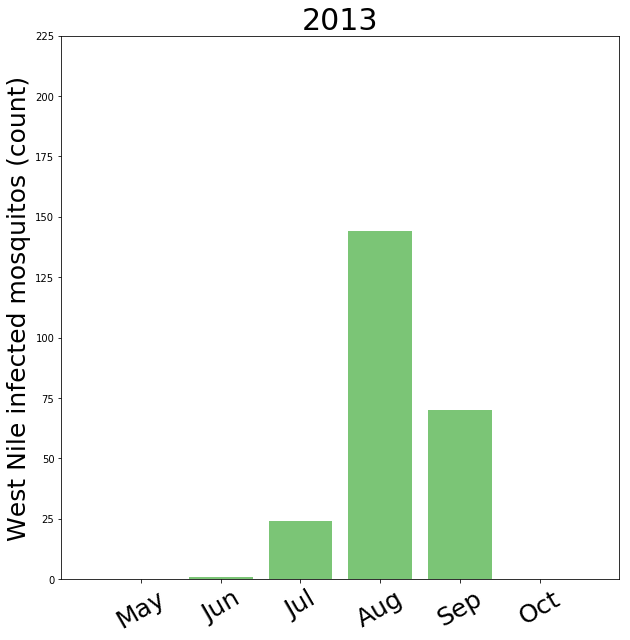

In [7]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = dfa[dfa['Year'] == 2013]
dfa = pd.DataFrame(dfa.groupby(by = 'Month').sum().reset_index()[['Month','NumMosquitos','WnvPresent']])

plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Month'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('2013', fontsize = 30)
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)
plt.ylim((0,225))
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbymonth2013.png")

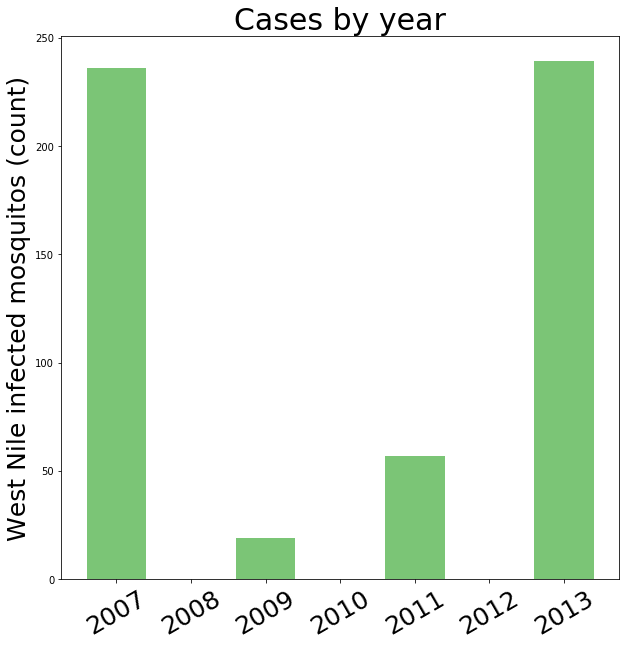

In [8]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = pd.DataFrame(dfa.groupby(by = 'Year').sum().reset_index()[['Year','NumMosquitos','WnvPresent']])


plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa['Year'], dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('Cases by year', fontsize = 30)
plt.xlabel('')
plt.ylabel('West Nile infected mosquitos (count)', fontsize = 25)

plt.xticks([2007,2008,2009,2010,2011,2012,2013],['2007','2008','2009','2010','2011','2012','2013'],fontsize = 25, rotation = 30)
plt.savefig("assets/visualizations/casesbyyear.png")

### Grouped by trap:

In [9]:
dfa = train_df
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Month'] = dfa['Date'].dt.month
dfa['Year'] = dfa['Date'].dt.year
dfa = pd.DataFrame(dfa.groupby(by = ['Trap','Latitude','Longitude']).sum().reset_index().sort_values('WnvPresent', ascending = False)[['Trap','NumMosquitos','WnvPresent','Latitude','Longitude']])
dfa.to_csv('assets/groupedtrapdata.csv')

In [10]:
dfa.shape

(138, 5)

In [11]:
print("The top traps are responsible for many of the 551 total cases.")
dfa.head()

The top traps are responsible for many of the 551 total cases.


,Trap,NumMosquitos,WnvPresent,Latitude,Longitude
136,T900,15386,66,41.974689,-87.890615
84,T115,21668,41,41.673408,-87.599862
1,T002,3710,18,41.954690,-87.800991
88,T138,9936,16,41.726465,-87.585413
2,T003,1346,14,41.964242,-87.757639


In [12]:
dfa.tail()

,Trap,NumMosquitos,WnvPresent,Latitude,Longitude
97,T149,15,0,41.994469,-87.667736
98,T150,56,0,42.006858,-87.675919
101,T153,256,0,41.907645,-87.760886
105,T157,47,0,41.825902,-87.667827
0,T001,25,0,41.953705,-87.733974


In [13]:
print("There are 39 traps that never had infections in the training set.")
dfa[dfa['WnvPresent'] == 0].shape

There are 39 traps that never had infections in the training set.


(39, 5)

The data in these plots is better shown in the Tableau file in the presentation.

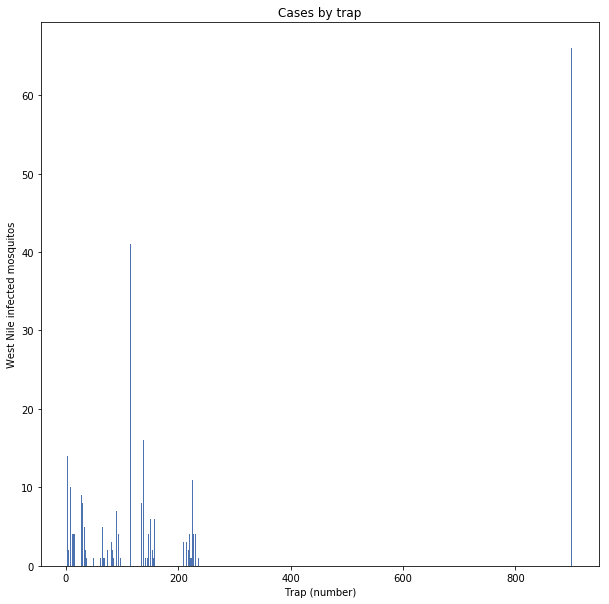

In [14]:
plt.figure(figsize=(10,10))
plt.bar(dfa['Trap'].map(lambda x: int(x[1:].replace('C',"").replace('A',"").replace('B',''))), dfa['WnvPresent'])
plt.title('Cases by trap')
plt.xlabel('Trap (number)')
plt.ylabel('West Nile infected mosquitos')
plt.savefig("assets/visualizations/casesbytrap1.png")

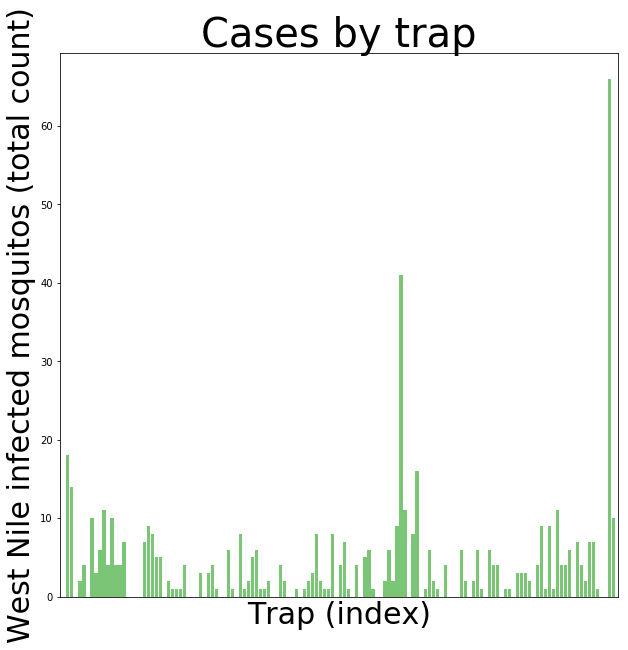

In [15]:
plt.gcf().clear()
plt.style.use('seaborn-deep')

plt.figure(figsize=(10,10))
plt.bar(dfa.index, dfa['WnvPresent'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title('Cases by trap', fontsize = 40)
plt.xlabel('Trap (index)', fontsize = 30)
plt.ylabel('West Nile infected mosquitos (total count)', fontsize = 30 )
plt.xticks([],[])
plt.xlim((-1,max(dfa.index)+1))
plt.savefig("assets/visualizations/casesbytrap2.png")

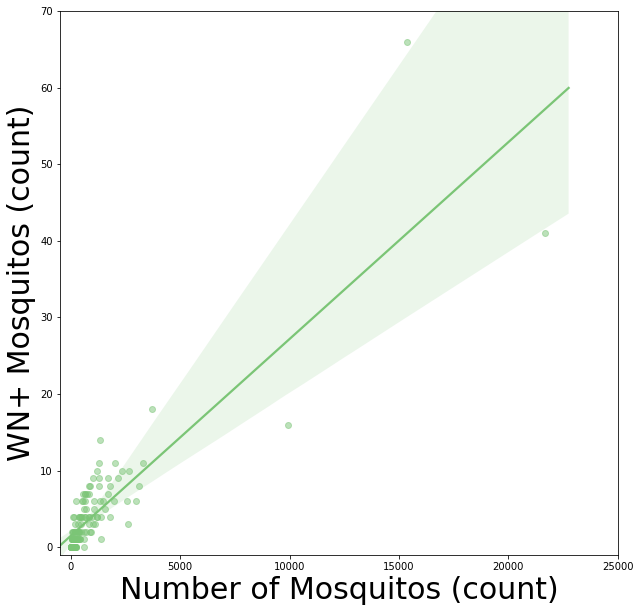

In [16]:
plt.figure(figsize=(10,10))
sns.regplot(dfa['NumMosquitos'], dfa['WnvPresent'], color = '#7BC576', scatter_kws = {'alpha' : 0.5})
plt.xlim((-500,25000))
plt.ylim((-1,70))
# plt.title('Mosquitos vs. WN+ count\nGrouped by Trap', fontsize = 40)
plt.xlabel('Number of Mosquitos (count)', fontsize = 30)
plt.ylabel('WN+ Mosquitos (count)', fontsize = 30 )
plt.savefig('assets/visualizations/trap_nummos_wnv.png')

## 3. Feature Engineering and analysis of engineered features
### Fixing the 'Species' column
Since the only *Culex* that *can* carry West Nile are *pipiens* and *restuans*, the other irrelevant mosquitos can be grouped together and dummies generated on those new groupings.

In [17]:
train_df['Species'] = train_df['Species'].map(lambda x: "OTHER" if ((x != 'CULEX PIPIENS/RESTUANS') & (x != 'CULEX RESTUANS') & (x != 'CULEX PIPIENS')) else x)

In [18]:
print('Count for modified species in train:')
print(train_df['Species'].value_counts())

Count for modified species in train:
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
OTHER                      315
Name: Species, dtype: int64


In [19]:
#  Generating dummies
train_df = pd.get_dummies(train_df, columns=['Species'])

In [20]:
train_df.head(2)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_OTHER
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,2007,0,1,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,2007,0,0,1,0


In [21]:
# Since 'OTHER' is the irrelevant kind of mosquito it makes the most sense to drop it. The cleaning scripts do this.
# train_df.drop(labels = ['Species_OTHER'],  axis = 1, inplace=True)

In [22]:
train_df.head(2)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Month,Year,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_OTHER
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,2007,0,1,0,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,5,2007,0,0,1,0


In [23]:
train_df.groupby('Month').sum()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_OTHER
Month,,,,,,,,,,,
5,3097,3514.839121,-7365.829275,666,230,0,168706,4.0,42.0,38.0,0.0
6,54605,65775.038242,-137818.154814,12762,16578,1,3158293,81.0,704.0,745.0,41.0
7,94512,109060.831911,-228566.934243,20589,37248,46,5238128,348.0,1196.0,983.0,79.0
8,132516,156878.709815,-328902.436535,28679,58036,377,7535981,1402.0,1635.0,603.0,111.0
9,79869,92806.393646,-194518.733949,17280,21029,125,4457438,754.0,1048.0,345.0,71.0
10,10337,11547.196643,-24203.144456,2176,1918,2,554062,110.0,127.0,26.0,13.0


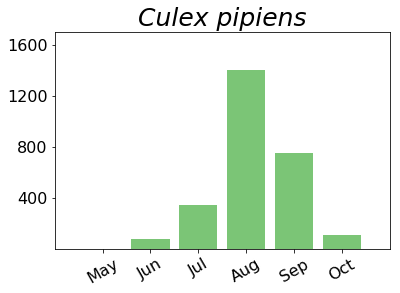

In [24]:
plt.bar(train_df.groupby('Month').sum().index, train_df.groupby('Month').sum()['Species_CULEX PIPIENS'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title("Culex pipiens", style = 'italic', fontsize = 25)
plt.ylim((0,1700))
plt.yticks([400,800,1200,1600], fontsize = 16)
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 16, rotation = 30)
plt.savefig("assets/visualizations/culexpipiensbymonth.png")

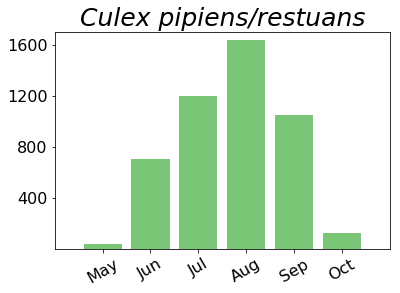

In [25]:
plt.bar(train_df.groupby('Month').sum().index, train_df.groupby('Month').sum()['Species_CULEX PIPIENS/RESTUANS'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title("Culex pipiens/restuans", style = 'italic', fontsize = 25)
plt.ylim((0,1700))
plt.yticks([400,800,1200,1600], fontsize = 16)
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 16, rotation = 30)
plt.savefig("assets/visualizations/culexpipiensrestuansbymonth.png")

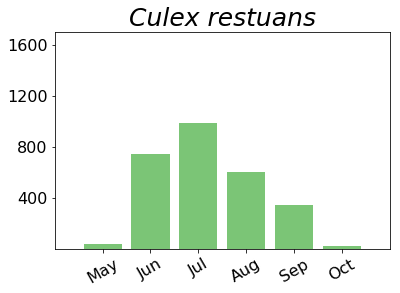

In [26]:
plt.bar(train_df.groupby('Month').sum().index, train_df.groupby('Month').sum()['Species_CULEX RESTUANS'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title("Culex restuans", style = 'italic', fontsize = 25)
plt.ylim((0,1700))
plt.yticks([400,800,1200,1600], fontsize = 16)
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 16, rotation = 30)
plt.savefig("assets/visualizations/culexrestuansbymonth.png")

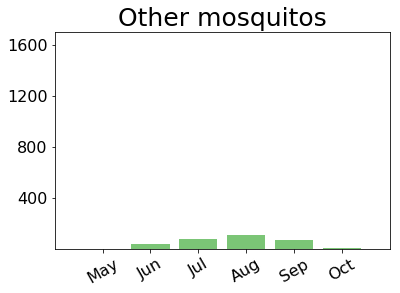

In [27]:
plt.bar(train_df.groupby('Month').sum().index, train_df.groupby('Month').sum()['Species_OTHER'], color = '#7BC576', edgecolor = 'none', align = 'center')
plt.title("Other mosquitos", fontsize = 25)
plt.ylim((0,1700))
plt.yticks([400,800,1200,1600], fontsize = 16)
plt.xlim((4,11))
plt.xticks([5,6,7,8,9,10],['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], fontsize = 16, rotation = 30)
plt.savefig("assets/visualizations/othermosquitosbymonth.png")

Not only are these species not relevant for predicting West Nile, but they aren't common either.

### Building a better parks csv
The only information we will be using in this model is the location and size of every Chicago park. Other features, while potentially useful, will complicate the model.

In [28]:
# Read the data (should be in assets)
parks_df = pd.read_csv('assets/Parks_-_Locations__deprecated_November_2016_.csv')
# Subset important columns
parks_df = parks_df[['ACRES', 'LOCATION']]
# The first several lines are junk for some reason
parks_df.drop(labels = [0,1,2,3], axis = 0, inplace=True)
# Regex patterns to extract the lat and lon 
pat1 = "\((\d{2}\.\d{2,})"
pat2 = ", (-\d{2}\.\d{2,})"
# Adding these as new columns
parks_df['lat'] = parks_df.LOCATION.str.extract(pat1)
parks_df['lon'] = parks_df.LOCATION.str.extract(pat2)
# Dropping the original
parks_df.drop(labels= ['LOCATION'], axis = 1, inplace=True)
# Saving the modified csv
parks_df.to_csv("assets/modified_parks.csv")

In [29]:
parks_df.head()

,ACRES,lat,lon
4,0.89,42.01933233897205,-87.66405025628663
5,5.05,41.68478426640253,-87.66639909058227
6,91.20,41.863104937710304,-87.60910669563046
7,0.53,41.811541485828116,-87.71908521574412
8,0.16,41.96626558405787,-87.65608306077826


Next step is to put together a set of functions to create a "park score" based on this modified parks database. The formula is as follows:  

$$Score = \Sigma_i^n Area_i / Dist_i$$  
For every trap, the score is each park's area divided by the distance between the trap and that park, summed over all parks.

In [30]:
# From James's lat_lon_ds function:

def lat_lon_ds(p_1, p_2):
    """Argument 'p1' is a list of decimal [lat, lon] coords in degrees. 'p2' is another list.
    Function returns the distance between them in meters, without correction for curvature of the earth.
    Distance will be slightly underestimated by a fraction approximately (t - sin(t)), where t is the angular separation
    between the two points in radians.  For 1 degree of latitude, the relative error is < 1e-6."""

    import numpy as np

    # http://frederic.chambat.free.fr/geophy/inertie_pepi01/article.pdf
    # Equitorial radius, eqn. 15
    R_earth = 6378137  # meters

    # Distance btw O'Hare and Wrigley field is 20879.8 meters, along a great circle
    # coords are [41.94885800000001, 87.65774809999999], [41.9741625, 87.9073214]
    # According to http://edwilliams.org/gccalc.htm
    # This gives a Chicago-area correction factor of (20879.8/20849.9),
    # where the denominator is calculated using uncorrected R_earth.

    R = R_earth*(20879.8/20849.9)

    theta_1 = (90 - p_1[0])*(2*np.pi/360)
    phi_1 = p_1[1]*(2*np.pi/360)
    theta_2 = (90 - p_2[0])*(2*np.pi/360)
    phi_2 = p_2[1]*(2*np.pi/360)

    def x(r,phi,theta):
        return r*np.sin(theta)*np.cos(phi)

    def y(r,phi,theta):
        return r*np.sin(theta)*np.sin(phi)

    def z(r,phi,theta):
        return r*np.cos(theta)

    # Calculate euclidean distance
    delta_s= np.sqrt(
        (x(R, phi_1, theta_1) - x(R, phi_2, theta_2))**2 + \
        (y(R, phi_1, theta_1) - y(R, phi_2, theta_2))**2 + \
        (z(R, phi_1, theta_1) - z(R, phi_2, theta_2))**2 \
    )

    return delta_s

# The function version of the above parks modifying script.

def modify_parks_csv(parks_csv = '../Parks_-_Locations__deprecated_November_2016_.csv'):
    parks_df = pd.read_csv(parks_csv)

    parks_df = parks_df[['ACRES', 'LOCATION']]

    parks_df.drop(labels = [0,1,2,3], axis = 0, inplace=True)

    pat1 = "\((\d{2}\.\d{2,})"
    pat2 = ", (-\d{2}\.\d{2,})"
    parks_df['lat'] = parks_df.LOCATION.str.extract(pat1)
    parks_df['lon'] = parks_df.LOCATION.str.extract(pat2)
    parks_df.drop(labels= ['LOCATION'], axis = 1, inplace=True)
    parks_df.to_csv("modified_parks.csv")

# How to calculate the score for one park

def score(entry_lat, entry_lon, area_col, lat_col, lon_col):
    score = 0
    for lat, lon, area in zip(lat_col, lon_col, area_col):
        score += area / lat_lon_ds((entry_lat,entry_lon), (lat,lon))
        # print(score)
    return score

# Generating a list of park scores

def make_score_column(df, park_df):
    lat_col = park_df['lat'].astype(float)
    lon_col = park_df['lon'].astype(float)
    area_col = park_df['ACRES'].astype(float)

    entry_lat_col = df['Latitude']
    entry_lon_col = df['Longitude']
    score_column = []
    for entry_lat, entry_lon in zip(entry_lat_col, entry_lon_col):
        score_column.append(score(entry_lat, entry_lon, area_col, lat_col, lon_col))

    return score_column

# Reading in data

parkdf = pd.read_csv("modified_parks.csv")
df = pd.read_csv("./assets/train_with_neighborhoods.csv")

# Adding park score column

df['park_score'] = make_score_column(df, parkdf)

print(df[['neighborhood', 'park_score']].head(3))


            neighborhood  park_score
0                Dunning    0.575236
1                Dunning    0.575236
2  Sauganash,Forest Glen    0.574931


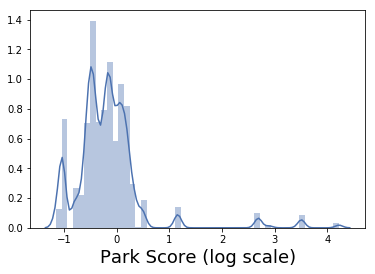

In [31]:
sns.distplot(np.log(df['park_score']))
plt.xlabel("Park Score (log scale)", fontsize = 18)
plt.savefig('assets/visualizations/parkscore_distr.png')

In [32]:
parkdf.shape

(577, 4)

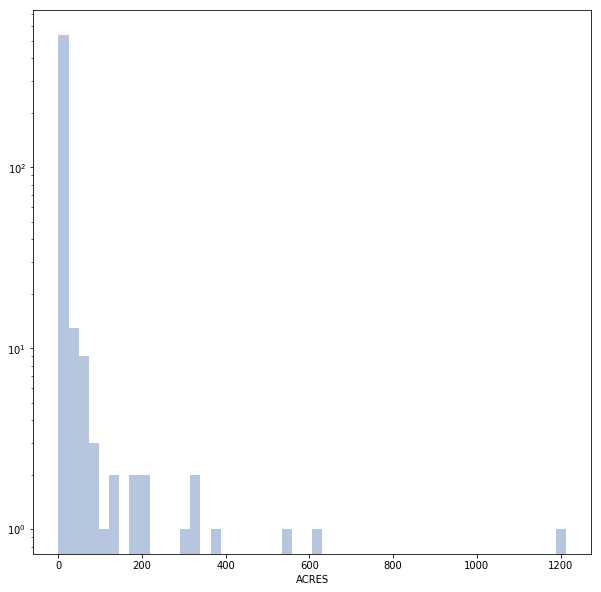

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(parkdf['ACRES'], kde = False, hist_kws={'log':True})

Distribution of park scores:

### How is West Nile distributed in each neighborhood?

In [34]:
wnv_neigh = pd.DataFrame(df.groupby('neighborhood').WnvPresent.sum()).sort_values('WnvPresent', ascending = False).reset_index()

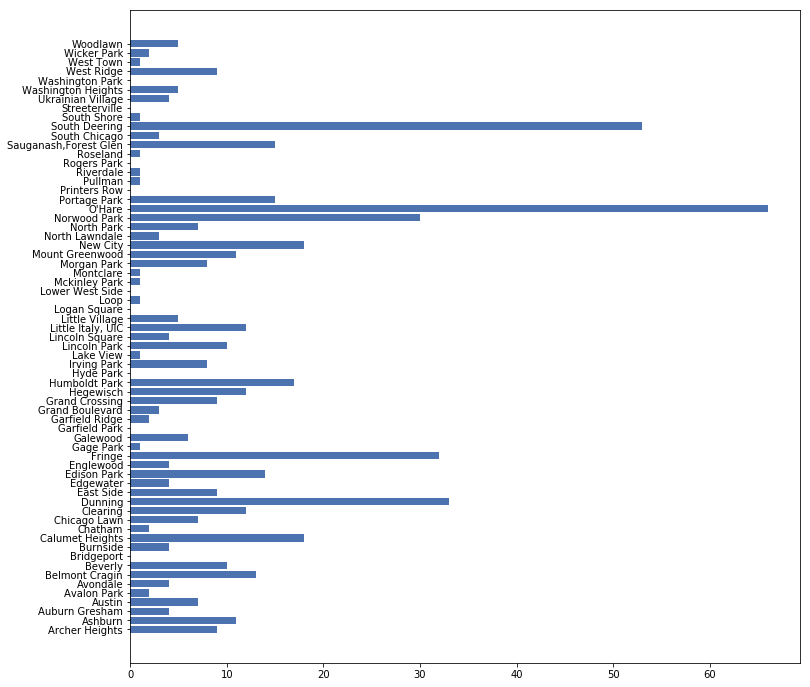

In [35]:
plt.figure(figsize=(12,12))
plt.barh(wnv_neigh['neighborhood'], wnv_neigh['WnvPresent'])
plt.savefig('assets/visualizations/wnv_per_neighborhood.png')

Let's group these into categories.

In [36]:
nbh_wnv_df = pd.DataFrame(df.groupby('neighborhood').WnvPresent.sum()).sort_values('WnvPresent', ascending = False)
nbh_wnv_df.head()

,WnvPresent
neighborhood,
O'Hare,66
South Deering,53
Dunning,33
Fringe,32
Norwood Park,30
New City,18
Calumet Heights,18
Humboldt Park,17
"Sauganash,Forest Glen",15


Looks like there are four groups: the high rate neighborhoods (greater than 30 infections), the medium (between 4 and 18), the low (between 1 and 4), and the no infection (0). A dictionary mapping will fix this right up.

In [37]:
d = {
    range(30, 67): "high",
    range(4, 30): "medium",
    range(1,4): "low"
}

Here's some clever code I found in Stack Overflow: the lambda function here looks to see if x is in the key, and if it is, it puts in the value. Otherwise it puts in `'none'`.

In [38]:
nbh_wnv_df['infection_rate'] = nbh_wnv_df['WnvPresent'].apply(lambda x: next((v for k, v in d.items() if x in k), 'none'))

And now I'm turning THAT into a dictionary so I can map the neighborhoods in test, where I don't know the infection rate!

In [39]:
dict(nbh_wnv_df['infection_rate'])

{"O'Hare": 'high',
 'South Deering': 'high',
 'Dunning': 'high',
 'Fringe': 'high',
 'Norwood Park': 'high',
 'New City': 'medium',
 'Calumet Heights': 'medium',
 'Humboldt Park': 'medium',
 'Sauganash,Forest Glen': 'medium',
 'Portage Park': 'medium',
 'Edison Park': 'medium',
 'Belmont Cragin': 'medium',
 'Hegewisch': 'medium',
 'Clearing': 'medium',
 'Little Italy, UIC': 'medium',
 'Mount Greenwood': 'medium',
 'Ashburn': 'medium',
 'Beverly': 'medium',
 'Lincoln Park': 'medium',
 'Grand Crossing': 'medium',
 'Archer Heights': 'medium',
 'West Ridge': 'medium',
 'East Side': 'medium',
 'Morgan Park': 'medium',
 'Irving Park': 'medium',
 'North Park': 'medium',
 'Chicago Lawn': 'medium',
 'Austin': 'medium',
 'Galewood': 'medium',
 'Little Village': 'medium',
 'Washington Heights': 'medium',
 'Woodlawn': 'medium',
 'Lincoln Square': 'medium',
 'Auburn Gresham': 'medium',
 'Ukrainian Village': 'medium',
 'Burnside': 'medium',
 'Avondale': 'medium',
 'Englewood': 'medium',
 'Edgewater'

Pulling it all together:

In [40]:
def add_neighborhood_infection_column(df):
    """takes a dataframe with a neighborhood column and a WnvPresent column and adds a column"""
    d = {"O'Hare": 'high',
     'South Deering': 'high',
     'Dunning': 'high',
     'Fringe': 'high',
     'Norwood Park': 'high',
     'New City': 'medium',
     'Calumet Heights': 'medium',
     'Humboldt Park': 'medium',
     'Sauganash,Forest Glen': 'medium',
     'Portage Park': 'medium',
     'Edison Park': 'medium',
     'Belmont Cragin': 'medium',
     'Hegewisch': 'medium',
     'Clearing': 'medium',
     'Little Italy, UIC': 'medium',
     'Mount Greenwood': 'medium',
     'Ashburn': 'medium',
     'Beverly': 'medium',
     'Lincoln Park': 'medium',
     'Grand Crossing': 'medium',
     'Archer Heights': 'medium',
     'West Ridge': 'medium',
     'East Side': 'medium',
     'Morgan Park': 'medium',
     'Irving Park': 'medium',
     'North Park': 'medium',
     'Chicago Lawn': 'medium',
     'Austin': 'medium',
     'Galewood': 'medium',
     'Little Village': 'medium',
     'Washington Heights': 'medium',
     'Woodlawn': 'medium',
     'Lincoln Square': 'medium',
     'Auburn Gresham': 'medium',
     'Ukrainian Village': 'medium',
     'Burnside': 'medium',
     'Avondale': 'medium',
     'Englewood': 'medium',
     'Edgewater': 'medium',
     'Grand Boulevard': 'low',
     'South Chicago': 'low',
     'North Lawndale': 'low',
     'Chatham': 'low',
     'Wicker Park': 'low',
     'Avalon Park': 'low',
     'Garfield Ridge': 'low',
     'South Shore': 'low',
     'Riverdale': 'low',
     'West Town': 'low',
     'Roseland': 'low',
     'Lake View': 'low',
     'Pullman': 'low',
     'Gage Park': 'low',
     'Montclare': 'low',
     'Mckinley Park': 'low',
     'Loop': 'low',
     'Rogers Park': 'none',
     'Bridgeport': 'none',
     'Hyde Park': 'none',
     'Garfield Park': 'none',
     'Streeterville': 'none',
     'Washington Park': 'none',
     'Lower West Side': 'none',
     'Logan Square': 'none',
     'Printers Row': 'none'}
    
    df['neighborhood_infection_category'] = df['neighborhood'].map(d)
    return df

practice_df = pd.read_csv("/Users/jswithers/ga-dsi/project4-group2/assets/train_with_neighborhoods.csv", index_col=0)

practice_df = add_neighborhood_infection_column(practice_df)

practice_df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,neighborhood,neighborhood_infection_category
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,Dunning,high
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,Dunning,high


## 4. Modeling
### SVM attempt

master_train_shape:  (9686, 28)


Columns in input dataset: 
['address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'nummosquitos', 'wnvpresent', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'neighborhood_infection_category_low', 'neighborhood_infection_category_medium', 'neighborhood_infection_category_none', 'park_score', 'daylight', 'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight', 'timelaggedtemperature', 'timelaggedprecipitation', 'timelaggedwindspeed', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10']
 
Features and types:
species_culex_pipiens                       int64
species_culex_pipiens_restuans              int64
species_culex_restuans                      int64
neighborhood_infection_category_high        int64
neighborhood_infection_category_low         int64
neighborhood_infection_categor

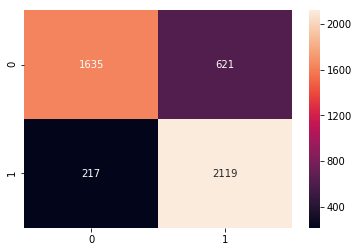

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

master_train = pd.read_csv("assets/master_clean_train.csv", index_col=0)

print("master_train_shape: ", master_train.shape)
print("\n")

master_train['dtdate'] = pd.to_datetime(master_train['dtdate'])

master_train['month'] = master_train['dtdate'].dt.month

master_train = pd.get_dummies(master_train, columns=['month'], drop_first=True)

print("Columns in input dataset: ")
print(list(master_train.columns))

target = 'wnvpresent'
features = ['species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10']
X = master_train[features]
y = master_train[target]

print(" ")
print("Features and types:")
print(X.dtypes, "\n--------")

ros = RandomOverSampler()

X_res, y_res = ros.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res)
# X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

supvec = SVC(probability=True)


supvec.fit(X_train, y_train)
print("SVC results: ")
print("Cross-val score: ", cross_val_score(supvec, X_train, y_train, cv = 5, scoring="roc_auc"))
print(" ")
print("Test score: ", roc_auc_score(y_test, supvec.predict(X_test)))

predictions = supvec.predict_proba(X_test)

pos_predictions = [i[1] for i in predictions]

sns.heatmap(confusion_matrix(y_test, supvec.predict(X_test)), annot = True, fmt = "g")
plt.show()

import pickle

filename = 'support_vector_model.pkl'
pickle.dump(supvec, open(filename, 'wb'))

In [42]:
master_test = pd.read_csv("assets/master_clean_test.csv", index_col=0)

print("master_test_shape: ", master_test.shape)
print("\n")

master_test['dtdate'] = pd.to_datetime(master_test['dtdate'])

master_test['month'] = master_test['dtdate'].dt.month

master_test = pd.get_dummies(master_test, columns=['month'], drop_first=True)
master_test['month_6'] = 0

print("Columns in output dataset: ")
print(list(master_test.columns))
print("")
print("Columns in input dataset: ")
print(list(master_train.columns))

X_val = master_test[features]

print(" ")
print("Features and types:")
print(X_val.dtypes, "\n--------")

master_test_shape:  (116293, 27)


Columns in output dataset: 
['date', 'address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'neighborhood_infection_category_low', 'neighborhood_infection_category_medium', 'neighborhood_infection_category_none', 'park_score', 'daylight', 'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight', 'timelaggedtemperature', 'timelaggedprecipitation', 'timelaggedwindspeed', 'month_7', 'month_8', 'month_9', 'month_10', 'month_6']

Columns in input dataset: 
['address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'nummosquitos', 'wnvpresent', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'nei

In [43]:
def output_to_kaggle(test_df, X, model, filename):
    p_array = model.predict_proba(X)
    p_series = pd.Series(p_array[:,1])
    out_df = pd.concat([test_df.index.to_series().reset_index(drop=True),p_series], axis=1)
    out_df.columns = ['Id', 'WnvPresent']
    out_df.to_csv(filename, header=True, index=False)
    return out_df
import time

In [44]:
outfilename = r'kagglesubmission'+ '_' + time.strftime('%Y-%m-%d_%H-%M-%S', time.localtime()) + '.csv'
out_df = output_to_kaggle(master_test, X_val, supvec, outfilename)

### Neural Network model

In [45]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

master_train = pd.read_csv("assets/master_clean_train.csv", index_col=0)

print("master_train_shape: ", master_train.shape)
print("\n")

master_train['dtdate'] = pd.to_datetime(master_train['dtdate'])

master_train['month'] = master_train['dtdate'].dt.month

master_train = pd.get_dummies(master_train, columns=['month'], drop_first=True)

print("Columns in input dataset: ")
print(list(master_train.columns))

target = 'wnvpresent'
features = ['species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'neighborhood_infection_category_high',
       'neighborhood_infection_category_low',
       'neighborhood_infection_category_medium',
       'neighborhood_infection_category_none', 'park_score', 'daylight',
       'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight',
       'timelaggedtemperature', 'timelaggedprecipitation',
       'timelaggedwindspeed', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10']
X = master_train[features]
y = master_train[target]

print(" ")
print("Features and types:")
print(X.dtypes, "\n--------")

ros = RandomOverSampler(ratio = 'minority')

X_res, y_res = ros.fit_sample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res)
# X_train, X_test, y_train, y_test = train_test_split(X, y)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Using TensorFlow backend.


master_train_shape:  (9686, 28)


Columns in input dataset: 
['address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'nummosquitos', 'wnvpresent', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'neighborhood_infection_category_low', 'neighborhood_infection_category_medium', 'neighborhood_infection_category_none', 'park_score', 'daylight', 'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight', 'timelaggedtemperature', 'timelaggedprecipitation', 'timelaggedwindspeed', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10']
 
Features and types:
species_culex_pipiens                       int64
species_culex_pipiens_restuans              int64
species_culex_restuans                      int64
neighborhood_infection_category_high        int64
neighborhood_infection_category_low         int64
neighborhood_infection_categor

In [46]:
model = Sequential()
n_input = X_train.shape[1]
n_hidden = n_input
n_output = 1

model.add(Dense(n_hidden, input_dim = n_input, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(n_hidden , activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(n_output, activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [47]:
model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [48]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 100, batch_size = None, verbose = 0) # after testing this makes sense not to show mki m

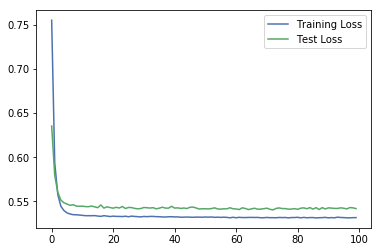

In [49]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label = 'Training Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()

In [50]:
master_test = pd.read_csv("assets/master_clean_test.csv", index_col=0)

print("master_test_shape: ", master_test.shape)
print("\n")

master_test['dtdate'] = pd.to_datetime(master_test['dtdate'])

master_test['month'] = master_test['dtdate'].dt.month

master_test = pd.get_dummies(master_test, columns=['month'], drop_first=True)
master_test['month_6'] = 0

print("Columns in output dataset: ")
print(list(master_test.columns))
print("")
print("Columns in input dataset: ")
print(list(master_train.columns))

X_val = master_test[features]

print(" ")
print("Features and types:")
print(X_val.dtypes, "\n--------")

master_test_shape:  (116293, 27)


Columns in output dataset: 
['date', 'address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'neighborhood_infection_category_low', 'neighborhood_infection_category_medium', 'neighborhood_infection_category_none', 'park_score', 'daylight', 'avg_tavg', 'avg_preciptotal', 'avg_avgspeed', 'timelaggeddaylight', 'timelaggedtemperature', 'timelaggedprecipitation', 'timelaggedwindspeed', 'month_7', 'month_8', 'month_9', 'month_10', 'month_6']

Columns in input dataset: 
['address', 'block', 'street', 'trap', 'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy', 'nummosquitos', 'wnvpresent', 'neighborhood', 'dtdate', 'species_culex_pipiens', 'species_culex_pipiens_restuans', 'species_culex_restuans', 'neighborhood_infection_category_high', 'nei

In [51]:
def nn_output_to_kaggle(test_df, X, model, filename):
    p = [float(i) for i in model.predict_proba(X)]
    p = pd.Series(p)
    out_df = pd.concat([test_df.index.to_series().reset_index(drop=True),p], axis=1)
    out_df.columns = ['Id', 'WnvPresent']
    out_df.to_csv(filename, header=True, index=False)
    return out_df
import time

In [52]:
outfilename = r'kagglesubmission'+ '_' + time.strftime('%Y-%m-%d_%H-%M-%S', time.localtime()) + '.csv'
out_df = nn_output_to_kaggle(master_test, X_val, model, outfilename)

## 5. Preparation for import-and-clean.py 
1. Turn Date into datetime type
2. Consider the following columns redundant? (Address, Block, Street, Address number and Street, Address Accuracy)
3. Bring in other data to make better use of the location information
4. Transform Latitude and Longitude information into a more useful form (distance to water, neighborhood, distance from other points?) **NOTE: THE LATITUDE AND LONGITUDE INFORMATION IS DERIVED FROM THE ADDRESS INFORMATION ACCORDING TO THE KAGGLE DESCRIPTION**

***These steps will each be implemented as a function, and a general cleaning function will gather them all together.***

In [53]:
def make_datetime(dataframe, date_col):
    pd.to_datetime(dataframe[date_col])

In [54]:
%run utilities/my_neighborhood_maker.py

In [55]:
get_neighborhood_for_point(train_df['Latitude'][0], train_df['Longitude'][0])

'Dunning'

### The code below creates new neighborhood columns. It is intensive to run.

In [56]:
# neighborhood_col = []
# for i in range(len(train_df['Latitude'])):
#     neighborhood_col.append(get_neighborhood_for_point(train_df['Latitude'][i], train_df['Longitude'][i]))

# len(neighborhood_col), train_df.shape[0]

# train_df['neighborhood'] = neighborhood_col

# train_df[train_df['neighborhood']=='Fringe']

# train_df.to_csv("train_with_neighborhoods.csv")

# neighborhood_col = []
# for i in range(len(test_df['Latitude'])):
#     neighborhood_col.append(get_neighborhood_for_point(test_df['Latitude'][i], test_df['Longitude'][i]))
# test_df['neighborhood'] = neighborhood_col

# test_df.to_csv('test_with_neighborhoods.csv')

## Neighborhoods missing in train: Hermosa and West Pullman 


**Instead of using the function every time this notebook is run, here we just load in the output from the above:**

In [78]:
train_df = pd.read_csv('assets/train_with_neighborhoods.csv', index_col=0)

In [79]:
len(train_df['neighborhood'].unique())

65

In [80]:
total_per_neighborhood_df = train_df.groupby('neighborhood').sum()[['WnvPresent','NumMosquitos']]

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.gcf().clear()
plt.style.use('seaborn-deep')

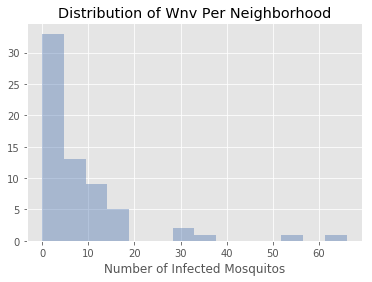

In [86]:
sns.distplot(total_per_neighborhood_df['WnvPresent'], kde = False)
plt.title("Distribution of Wnv Per Neighborhood")
plt.xlabel('Number of Infected Mosquitos')
plt.savefig('assets/visualizations/wnvnbh.png')

*There are two neighborhoods that have lots of West Nile.*

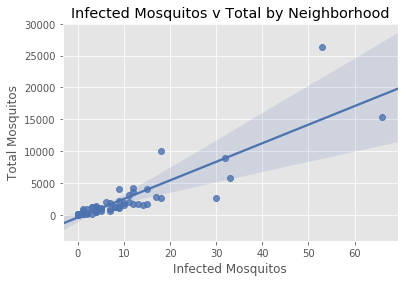

In [87]:
sns.regplot(total_per_neighborhood_df['WnvPresent'], total_per_neighborhood_df['NumMosquitos'])
plt.title('Infected Mosquitos v Total by Neighborhood')
plt.xlabel('Infected Mosquitos')
plt.ylabel('Total Mosquitos')
plt.savefig('assets/visualizations/inf_v_total.png')

*Again, this number seems to really stand out for about 5 of the neighborhoods.*

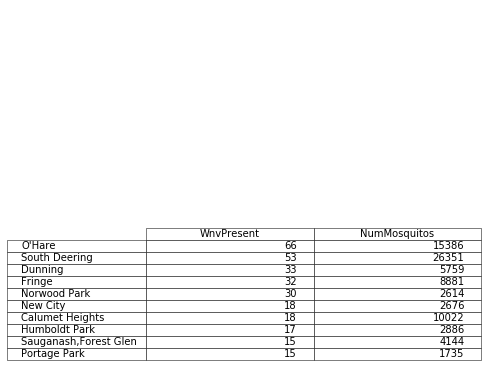

In [88]:

from pandas.plotting import table

plt.plot([1])
ax = plt.subplot(111, frame_on=False) # no visible frame

ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, total_per_neighborhood_df.sort_values(by = 'WnvPresent', ascending=False).head(10))  # where df is your data frame
plt.show()
plt.savefig('assets/visualizations/top_neighborhoods_wnv.png')

*Top 10 neighborhoods by West Nile*

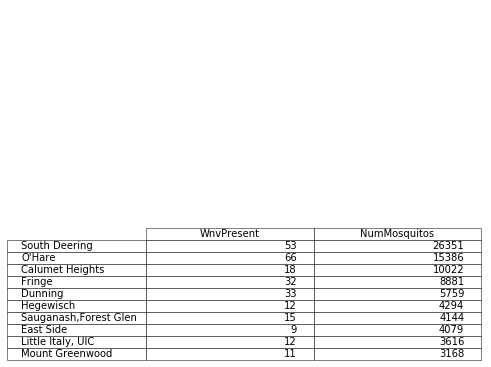

In [64]:
plt.plot([1])
ax = plt.subplot(111, frame_on=False) # no visible frame

ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, total_per_neighborhood_df.sort_values(by = 'NumMosquitos', ascending=False).head(10))  # where df is your data frame

plt.savefig('assets/visualizations/top_neighborhoods_nummos.png')


*Top 10 neighborhoods by NumMosquitos. Notice that South Deering and O'Hare have switched rankings. South Deering has more mosquitos but less virus... could the airport itself be a problem?*

*Also, is Calumet Heights a success story? What about the number of non-disease carrying mosquitos?*

In [90]:
train_df.groupby("Species").sum()[['NumMosquitos','WnvPresent']].sort_values('WnvPresent', ascending = False)

,NumMosquitos,WnvPresent
Species,,
CULEX PIPIENS/RESTUANS,66268,262
CULEX PIPIENS,44671,240
CULEX RESTUANS,23431,49
CULEX ERRATICUS,7,0
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


In [66]:
exploratory_df = train_df.groupby(['neighborhood', 'Species']).sum().reset_index()[['neighborhood','Species','NumMosquitos','WnvPresent']]

In [67]:
train_df[(train_df['WnvPresent'] != 0) & (train_df['Species']=="CULEX PIPIENS/RESTUANS")].shape

(262, 13)

In [68]:
exploratory_df[exploratory_df['WnvPresent'] != 0].sort_values('WnvPresent', ascending = False).head(10)

,neighborhood,Species,NumMosquitos,WnvPresent
208,O'Hare,CULEX PIPIENS/RESTUANS,9358,38
244,South Deering,CULEX PIPIENS,17713,37
207,O'Hare,CULEX PIPIENS,1758,20
60,Dunning,CULEX PIPIENS/RESTUANS,3233,18
203,Norwood Park,CULEX PIPIENS/RESTUANS,1521,17
83,Fringe,CULEX PIPIENS/RESTUANS,5091,16
245,South Deering,CULEX PIPIENS/RESTUANS,7445,15
59,Dunning,CULEX PIPIENS,931,15
41,Calumet Heights,CULEX PIPIENS,7464,14
82,Fringe,CULEX PIPIENS,1684,13


In [69]:
test_with_nbhoods = pd.read_csv('/Users/jswithers/ga-dsi/project4-group2/assets/test_with_neighborhoods.csv')

In [70]:
test_with_nbhoods['neighborhood'].isna().sum()

0

In [71]:
print("Loading master train set:")
train_df = pd.read_csv('assets/master_clean_train.csv', index_col=0)
print(train_df.isna().sum().sum(), "missing values")
print(train_df.shape)

Loading master train set:
0 missing values
(9686, 28)


In [72]:
print("Loading master test set:")
test_df = pd.read_csv('assets/master_clean_test.csv', index_col=0)
print(test_df.isna().sum().sum(), "missing values")
print(test_df.shape)

Loading master test set:
0 missing values
(116293, 27)


## 6. Appendix
### At some point this dictionary groupby demonstration was the model I used for most of my feature engineering

In [73]:
t_df = pd.DataFrame({
    'a':[1,2,3,4,5,6,7,8,9],
    'b':['a','a','a','b','b','b','c','c','c']
})


t_df

dict(t_df.groupby(by = 'b').a.mean())

t_df['b_avg'] = t_df['b'].map(dict(t_df.groupby(by = 'b').a.mean()))

t_df

,a,b,b_avg
0,1,a,2
1,2,a,2
2,3,a,2
3,4,b,5
4,5,b,5
5,6,b,5
6,7,c,8
7,8,c,8
8,9,c,8


### more neighborhoods EDA
This section generates a new .csv for some more Tableau visualization

In [74]:
train_df = pd.read_csv('assets/train_with_neighborhoods.csv', index_col=0)

In [75]:
def add_neighborhood_infection_column(df):
    """takes a dataframe with a neighborhood column and a WnvPresent column and adds a column"""
    d = {"O'Hare": 'high',
     'South Deering': 'high',
     'Dunning': 'high',
     'Fringe': 'high',
     'Norwood Park': 'high',
     'New City': 'medium',
     'Calumet Heights': 'medium',
     'Humboldt Park': 'medium',
     'Sauganash,Forest Glen': 'medium',
     'Portage Park': 'medium',
     'Edison Park': 'medium',
     'Belmont Cragin': 'medium',
     'Hegewisch': 'medium',
     'Clearing': 'medium',
     'Little Italy, UIC': 'medium',
     'Mount Greenwood': 'medium',
     'Ashburn': 'medium',
     'Beverly': 'medium',
     'Lincoln Park': 'medium',
     'Grand Crossing': 'medium',
     'Archer Heights': 'medium',
     'West Ridge': 'medium',
     'East Side': 'medium',
     'Morgan Park': 'medium',
     'Irving Park': 'medium',
     'North Park': 'medium',
     'Chicago Lawn': 'medium',
     'Austin': 'medium',
     'Galewood': 'medium',
     'Little Village': 'medium',
     'Washington Heights': 'medium',
     'Woodlawn': 'medium',
     'Lincoln Square': 'medium',
     'Auburn Gresham': 'medium',
     'Ukrainian Village': 'medium',
     'Burnside': 'medium',
     'Avondale': 'medium',
     'Englewood': 'medium',
     'Edgewater': 'medium',
     'Grand Boulevard': 'low',
     'South Chicago': 'low',
     'North Lawndale': 'low',
     'Chatham': 'low',
     'Wicker Park': 'low',
     'Avalon Park': 'low',
     'Garfield Ridge': 'low',
     'South Shore': 'low',
     'Riverdale': 'low',
     'West Town': 'low',
     'Roseland': 'low',
     'Lake View': 'low',
     'Pullman': 'low',
     'Gage Park': 'low',
     'Montclare': 'low',
     'Mckinley Park': 'low',
     'Loop': 'low',
     'Rogers Park': 'none',
     'Bridgeport': 'none',
     'Hyde Park': 'none',
     'Garfield Park': 'none',
     'Streeterville': 'none',
     'Washington Park': 'none',
     'Lower West Side': 'none',
     'Logan Square': 'none',
     'Printers Row': 'none'}

    df['neighborhood_infection_category'] = df['neighborhood'].map(d)

    return df

In [76]:
train_df = add_neighborhood_infection_column(train_df)

In [77]:
train_df.to_csv('assets/train_neighborhoods_with_infection.csv')